In [4]:
%config ZMQInteractiveShell.ast_node_interactivity = "all"
%pprint

Pretty printing has been turned OFF


## 载入库

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 修改图形尺寸
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["font.size"] = 14

## 载入数据

In [7]:
# 载入鸢尾花数据
iris_data = load_iris()
xdata = iris_data["data"]
ydata = iris_data["target"]
feature_names = list(map(lambda x: "_".join(x[:-4].split()), iris_data["feature_names"]))

# 数据集的合并
data = pd.DataFrame(xdata)
data.columns = feature_names
data["label"] = ydata

## 二分类

In [13]:
# 筛选数据集
X = xdata[ydata < 2, :2]
y = ydata[ydata < 2] 
# 修改标签
y[y == 0] = -1

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(X, y)

### 感知机

In [14]:
class model_perceptron(object):
    """
    功能：实现感知机算法
    参数 w：权重，默认都为None
    参数 b：偏置项，默认为0
    参数 alpha：学习率，默认为0.001
    参数 iter_epoch：迭代轮数，默认最大为1000
    """
    def __init__(self, w = None, b = 0, alpha = 0.001, max_iter_epoch = 1000):
        self.w = w
        self.b = b
        self.alpha = alpha
        self.max_iter_epoch = max_iter_epoch
        
    def linear_model(self, X):
        """功能：实现线性模型"""
        return np.dot(X, self.w) + self.b
         
    def fit(self, X, y):
        """
        功能：拟合感知机模型
        参数 X：训练集的输入数据
        参数 y：训练集的输出数据
        """
        # 按训练集的输入维度初始化w
        self.w = np.zeros(X.shape[1])
        # 误分类的样本就为True
        state = np.sign(self.linear_model(X)) != y
        # 迭代轮数
        total_iter_epoch = 1
        
        while state.any() and (total_iter_epoch <= self.max_iter_epoch):
            # 使用误分类点进行权重更新
            self.w += self.alpha * y[state][0] * X[state][0]
            self.b += self.alpha * y[state][0]
            
            # 状态更新
            total_iter_epoch += 1
            state = np.sign(self.linear_model(X)) != y
            
        print(f"fit model_perceptron(alpha = {self.alpha}, max_iter_epoch = {self.max_iter_epoch}, total_iter_epoch = {min(self.max_iter_epoch, total_iter_epoch)})")
        
    def predict(self, X):
        """
        功能：模型预测
        参数 X：测试集的输入数据
        """
        return np.sign(self.linear_model(X)) 
    
    def score(self, X, y):
        """
        功能：模型评价（准确率）
        参数 X：测试集的输入数据
        参数 y：测试集的输出数据
        """
        y_predict = self.predict(X)
        y_score = (y_predict == y).sum() / len(y)
        
        return y_score

In [15]:
ppn = model_perceptron()
ppn.fit(x_train, y_train)
ppn.predict(x_test)
ppn.score(x_test, y_test)

fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 1000)


array([-1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.])

0.96

### 作图

In [4]:
from matplotlib.colors import ListedColormap

def decision_plot(X, Y, clf, test_idx = None, resolution = 0.02):
    """
    功能：画分类器的决策图
    参数 X：输入实例
    参数 Y：实例标记
    参数 clf：分类器
    参数 test_idx：测试集的index
    参数 resolution：np.arange的间隔大小
    """
    # 标记和颜色设置
    markers = ['o', 's', 'x', '^', '>']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    
    # 图形范围
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    x = np.arange(xmin, xmax, resolution)
    y = np.arange(ymin, ymax, resolution)
    
    # 网格
    nx, ny = np.meshgrid(x, y)
    
    # 数据合并
    xdata = np.c_[nx.reshape(-1), ny.reshape(-1)]
    
    # 分类器预测
    z = clf.predict(xdata)
    z = z.reshape(nx.shape)
    
    # 作区域图
    plt.contourf(nx, ny, z, alpha = 0.4, cmap = cmap)
    plt.xlim(nx.min(), nx.max())
    plt.ylim(ny.min(), ny.max())
    
    # 画点
    for index, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                    alpha=0.8, c = cmap(index), 
                    marker=markers[index], label=cl)
    
    # 突出测试集的点
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=0.15,
                    linewidths=2,
                    marker='^',
                    edgecolors='black',
                    facecolors='none',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


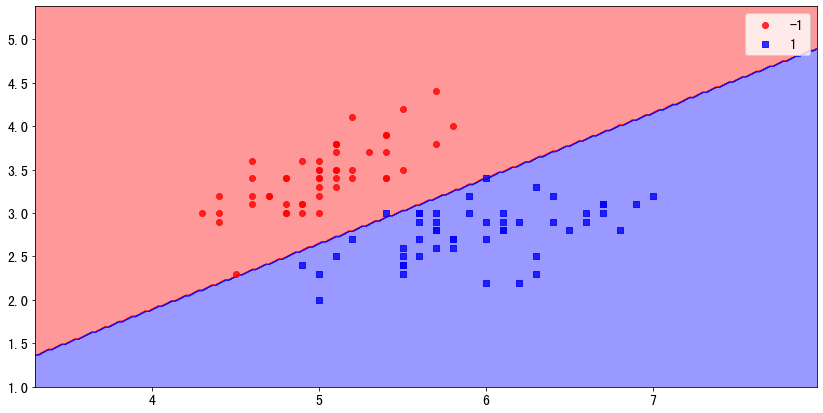

In [198]:
decision_plot(X, y, ppn)
plt.legend()

Text(0.5, 0, 'sepal_length')

Text(0, 0.5, 'sepal_width')

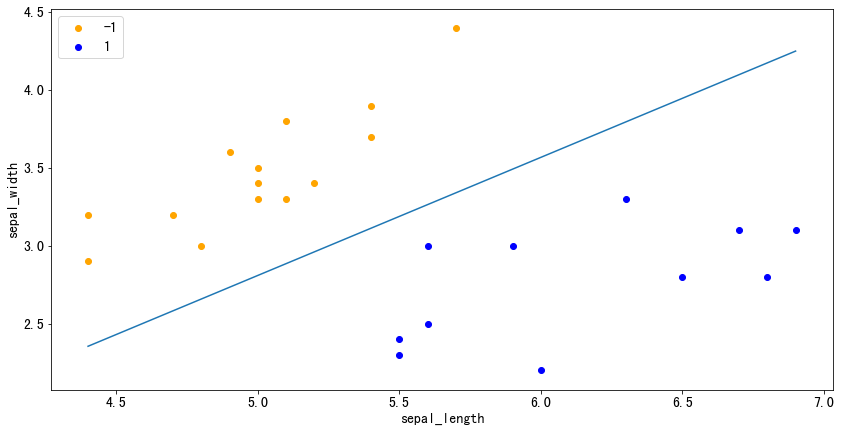

In [114]:
plt.scatter(x_test[y_test == -1, 0], x_test[y_test == -1, 1], color = "orange", label = "-1")
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color = "blue", label = "1")
plt.legend()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# 决策边界
x = np.linspace(min(x_test[:, 0]), max(x_test[:, 0]), 1000)
y = -(ppn.w[0] * x + ppn.b)/ppn.w[1]
plt.plot(x, y)

### 多维的情况

不局限于二维的情况

In [116]:
# 划分数据集
X = xdata[ydata < 2]
y = ydata[ydata < 2]
y = np.where(y == 0, -1, 1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [118]:
ppn = model_perceptron()
ppn.fit(xtrain, ytrain)
ppn.predict(xtest)
ppn.score(xtest, ytest)

fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 6)


array([-1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.])

1.0

## 多分类

### one vs. rest

假设有k个类别，生成k个分类器，最后选取概率最大的预测结果

In [36]:
class perceptron_ovr(object):
    """
    功能：实现感知机的多分类情形（采用one vs. rest策略）
    参数 w：权重，默认都为None
    参数 b：偏置项，默认为0
    参数 alpha：学习率，默认0.001
    参数 max_iter_epoch：最大迭代次数，默认为1000
    """
    def __init__(self, alpha = 0.001, max_iter_epoch = 1000):
        self.w = None
        self.b = None
        self.alpha = alpha
        self.max_iter_epoch = max_iter_epoch
        
    def linear_model(self, X):
        """功能：实现线性模型"""
        return np.dot(self.w, X.T) + self.b
        
    def fit(self, X, y):
        """
        功能：拟合感知机模型
        参数 X：训练集的输入数据
        参数 y：训练集的输出数据
        """
        # 生成各分类器对应的标记
        self.y_class = np.unique(y)
        y_ovr = np.vstack([np.where(y == i, 1, -1) for i in self.y_class])
        
        # 初始化w, b
        self.w = np.zeros([self.y_class.shape[0], X.shape[1]])
        self.b = np.zeros([self.y_class.shape[0], 1])
        
        # 拟合各分类器，并更新相应维度的w和b
        for index in range(self.y_class.shape[0]):
            ppn = model_perceptron(alpha = self.alpha, max_iter_epoch = self.max_iter_epoch)
            ppn.fit(X, y_ovr[index])
            self.w[index] = ppn.w
            self.b[index] = ppn.b
            
    def predict(self, X):
        """
        功能：模型预测
        参数 X：测试集的输入数据
        """
        # 值越大，说明第i维的分类器将该点分得越开，即属于该分类器的概率值越大
        y_predict = self.linear_model(X).argmax(axis = 0)
        
        # 还原原数据集的标签
        for index in range(self.y_class.shape[0]):
            y_predict = np.where(y_predict == index, self.y_class[index], y_predict)
            
        return y_predict
    
    def score(self, X, y):
        """
        功能：模型评价（准确率）
        参数 X：测试集的输入数据
        参数 y：测试集的输出数据
        """
        y_score = (self.predict(X) == y).sum()/len(y)
        return y_score

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata)

ppn = perceptron_ovr()
ppn.fit(xtrain, ytrain)
ppn.predict(xtest)
ppn.score(xtest, ytest)

fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 10)
fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 1000)
fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 1000)


array([0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0])

0.868421052631579

### one vs. one

假设有k个类别，生成k(k-1)/2个二分类器，最后通过多数投票来选取预测结果

In [21]:
from itertools import combinations

class perceptron_ovo(object):
    """
    功能：实现感知机的多分类情形（采用one vs. one策略）
    参数 w：权重，默认都为None
    参数 b：偏置项，默认为0
    参数 alpha：学习率，默认0.001
    参数 max_iter_epoch：最大迭代次数，默认为1000
    """
    def __init__(self, alpha = 0.001, max_iter_epoch = 1000):
        self.w = None
        self.b = None
        self.alpha = alpha
        self.max_iter_epoch = max_iter_epoch
        
    def linear_model(self, X):
        """功能：实现线性模型"""
        return np.dot(self.w, X.T) + self.b
        
    def fit(self, X, y):
        """
        功能：拟合感知机模型
        参数 X：训练集的输入数据
        参数 y：训练集的输出数据
        """
        # 生成各分类器对应的标记（使用排列组合）
        self.y_class = np.unique(y)
        self.y_combine = [i for i in combinations(self.y_class, 2)]
        
        # 初始化w和b
        clf_num = len(self.y_combine)
        self.w = np.zeros([clf_num, X.shape[1]])
        self.b = np.zeros([clf_num, 1])
        
        for index, label in enumerate(self.y_combine):
            # 根据各分类器的标签选取数据集
            cond = pd.Series(y).isin(pd.Series(label))
            xdata, ydata = X[cond], y[cond]
            ydata = np.where(ydata == label[0], 1, -1)
            
            # 拟合各分类器，并更新相应维度的w和b
            ppn = model_perceptron(alpha = self.alpha, max_iter_epoch = self.max_iter_epoch)
            ppn.fit(xdata, ydata)
            self.w[index] = ppn.w
            self.b[index] = ppn.b
    
    def voting(self, y):
        """
        功能：投票
        参数 y：各分类器的预测结果，接受的是元组如(1, 1, 2)
        """
        # 统计分类器预测结果的出现次数
        y_count = np.unique(np.array(y), return_counts = True)
        # 返回出现次数最大的结果位置索引
        max_index = y_count[1].argmax()
        # 返回某个实例投票后的结果
        y_predict = y_count[0][max_index]
        
        return y_predict
        
                      
    def predict(self, X):
        """
        功能：模型预测
        参数 X：测试集的输入数据
        """
        # 预测结果
        y_predict = np.sign(self.linear_model(X))
        # 还原标签（根据排列组合的标签）
        for index, label in enumerate(self.y_combine):
            y_predict[index] = np.where(y_predict[index] == 1, label[0], label[1])
        
        # 列为某一个实例的预测结果，打包用于之后的投票
        predict_zip = zip(*(i.reshape(-1) for i in np.vsplit(y_predict, self.y_class.shape[0])))
        # 投票得到预测结果
        y_predict = list(map(lambda x: self.voting(x), list(predict_zip)))
        
        return np.array(y_predict)
    
    def score(self, X, y):
        """
        功能：模型评价（准确率）
        参数 X：测试集的输入数据
        参数 y：测试集的输出数据
        """
        y_predict = self.predict(X)
        y_score = (y_predict == y).sum() / len(y)
        
        return y_score

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata)

ppn = perceptron_ovo()
ppn.fit(xtrain, ytrain)
ppn.predict(xtest)
ppn.score(xtest, ytest)

fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 6)
fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 4)
fit model_perceptron(alpha = 0.001, max_iter_epoch = 1000, total_iter_epoch = 1000)


array([1., 1., 0., 0., 2., 1., 2., 0., 0., 1., 0., 2., 2., 1., 2., 0., 1.,
       2., 1., 0., 0., 1., 2., 2., 0., 2., 2., 1., 0., 0., 1., 0., 2., 0.,
       2., 2., 0., 2.])

0.9736842105263158

准确率一般比one vs. rest要高，但是生成的分类器多

## 对偶算法

In [238]:
class perceptron_dual(object):
    """
    功能：实现感知机的对偶形式
    参数 beta：每个实例点更新的次数组成的向量
    参数 w：权重，默认都为None
    参数 b：偏置项，默认为0
    参数 alpha：学习率，默认0.001
    参数 max_iter_epoch：最大迭代次数，默认为1000
    """
    def __init__(self, alpha = 0.001, max_iter_epoch = 1000):
        self.beta = None
        self.w = None
        self.b = 0
        self.alpha = alpha
        self.max_iter_epoch = max_iter_epoch
        
    def fit(self, X, y):
        # 实例点的数量
        xnum = X.shape[0]
        # 初始化
        self.beta = np.zeros(xnum)
        
        # gram矩阵
        gram = np.dot(X, X.T)
        
        # 迭代条件
        state = y*((self.beta * y * gram).sum(axis = 1) + self.b) <= 0
        iter_epoch = 1
        
        while state.any() and (iter_epoch <= self.max_iter_epoch):
            nx = X[state][0]
            ny = y[state][0]
            index = (X == nx).argmax()
            self.beta[index] += self.alpha
            self.b += ny
            
            # 更新条件
            iter_epoch += 1
            state = y*((self.beta * y * gram).sum(axis = 1) + self.b) <= 0
        
        # 通过beta计算出w
        self.w = ((self.beta * y).reshape(-1, 1) * X).sum(axis = 0) 
        print(f"fit perceptron_dual(alpha = {self.alpha}, total_iter_epoch = {min(self.max_iter_epoch, iter_epoch)})")
            
        
    def predict(self, X):
        """
        功能：模型预测
        参数 X：测试集的输入数据
        """
        y_predict = np.sign(X @ self.w  + self.b)
        return y_predict
    
    def score(self, X, y):
        """
        功能：模型评价（准确率）
        参数 X：测试集的输入数据
        参数 y：测试集的输出数据
        """
        y_score = (self.predict(X) == y).sum() / len(y)
        
        return y_score

In [283]:
X = xdata[ydata < 2]
y = ydata[ydata < 2]
y = np.where(y == 0, -1, 1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

ppn = perceptron_dual()
ppn.fit(xtrain, ytrain)
ppn.predict(xtest)
ppn.score(xtest, ytest)

fit perceptron_dual(alpha = 0.001, total_iter_epoch = 407)


array([-1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.])

1.0

## sklearn实现

In [8]:
from sklearn.linear_model import Perceptron

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata)
ppn = Perceptron(max_iter = 1000)
ppn.fit(xtrain, ytrain)
ppn.predict(xtest)
ppn.score(xtest, ytest)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

array([0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0])

0.7631578947368421

In [31]:
# w
ppn.coef_

# b
ppn.intercept_

array([[  1.9,   6.9,  -8.3,  -3. ],
       [ 19.8, -32. ,  14.5, -32.8],
       [-18.4, -22.5,  40.6,  33.1]])

array([  1.,  16., -12.])